In [1]:
import keras

C:\Users\vadiv\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load dataset

In [2]:
from keras.datasets import mnist

In [3]:
# Load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


### Examine size and dimension

In [5]:
# printing the number of samples in x_train, x_test, y_train, y_test
print("shape of x_train: " + str(x_train.shape))
print("Number of samples in our training data: " + str(len(x_train)) )
print("Number of labels in our training data: " + str(len(y_train)) )
print("Number of samples in our test data: " + str(len(x_test)) )
print("Number of labels in our test data: " + str(len(y_test)) )

shape of x_train: (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


### Lets look at some of the images

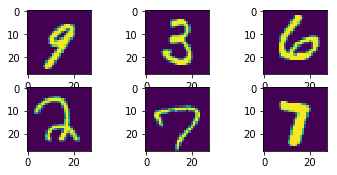

In [7]:
# importing matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Plot 6 images. Note sub plot arguments are nrow, ncols, index
plt.subplot(331)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num])

plt.subplot(332)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num])

plt.subplot(333)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num])

plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num])

plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num])

plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num])

plt.show()

### Prepare our datasets 

In [8]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
print(img_rows, img_cols)

28 28


In [9]:
print(x_train.shape, x_test.shape)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [10]:
input_shape = [ img_rows, img_cols, 1]

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [11]:
# Normalize our data by changing the range from ( 0 to 255 ) to ( 0, 1 )
x_train /= 255
x_test /= 255

In [12]:
print ( 'x_train_shape:', x_train.shape)
print ( 'x_test_shape:', x_test.shape)

x_train_shape: (60000, 28, 28, 1)
x_test_shape: (10000, 28, 28, 1)


### One hot encode of labels

In [13]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [15]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [16]:
print("Number of Classes: " + str(y_test.shape[1]))

Number of Classes: 10


In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

### Step 4 - Create Model
-> 1st layer uses 32 filters of size 3 * 3
-> 2nd layer uses 64 filters of size 3 * 3
-> downsample data to 2 * 2, apply a drop out where p = 0.25
-> then flatten maxpool output that is connect to dense layer that has output size of 128
-> 128 output is connected to output layer with 10 categorical units

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

#Create Model
model = Sequential()
model.add(Conv2D(32, 3,3 , activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64, 3,3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = SGD(0.01), metrics = ['accuracy'])
print(model.summary())

C:\Users\vadiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=[28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vadiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### Train our Model

In [20]:
batch_size = 32
epochs = 2

history = model.fit(x_train, y_train, batch_size=batch_size, epochs= epochs, verbose=1, validation_data =(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 360s 6ms/step - loss: 0.5979 - acc: 0.8128 - val_loss: 0.2127 - val_acc: 0.9369
Epoch 2/2
60000/60000 [==============================] - 307s 5ms/step - loss: 0.2899 - acc: 0.9125 - val_loss: 0.1393 - val_acc: 0.9565


In [21]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: ',score[0])
print('Test Accuracy: ',score[1])

10000/10000 [==============================] - 10s 976us/step
Test Loss:  0.13929227598160504
Test Accuracy:  0.9565


### Plotting our loss and Accuracy 

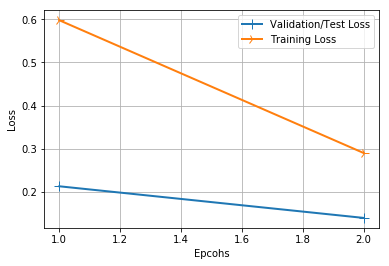

In [22]:
# Plotting our loss charts
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1, linewidth=2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize = 10.0)

plt.xlabel('Epcohs')
plt.ylabel('Loss')

plt.grid(True)
plt.legend()
plt.show()

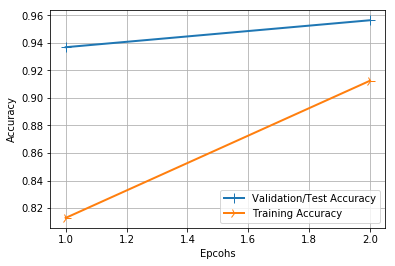

In [23]:
# Plotting our loss charts
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label = 'Training Accuracy')

plt.setp(line1, linewidth=2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize = 10.0)

plt.xlabel('Epcohs')
plt.ylabel('Accuracy')

plt.grid(True)
plt.legend()
plt.show()

### Saving and loading our model

In [24]:
model.save('simple_cnn_mnist.h5')

In [25]:
from keras.models import load_model
classifier = load_model('simple_cnn_mnist.h5')